In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [7]:
img = cv2.imread("/content/drive/MyDrive/learning/computer_vision/basic/image/dog.jpg")

In [8]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2023-01-10 08:16:56--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.03s   

2023-01-10 08:16:56 (5.99 MB/s) - ‘scan.jpeg’ saved [171933/171933]



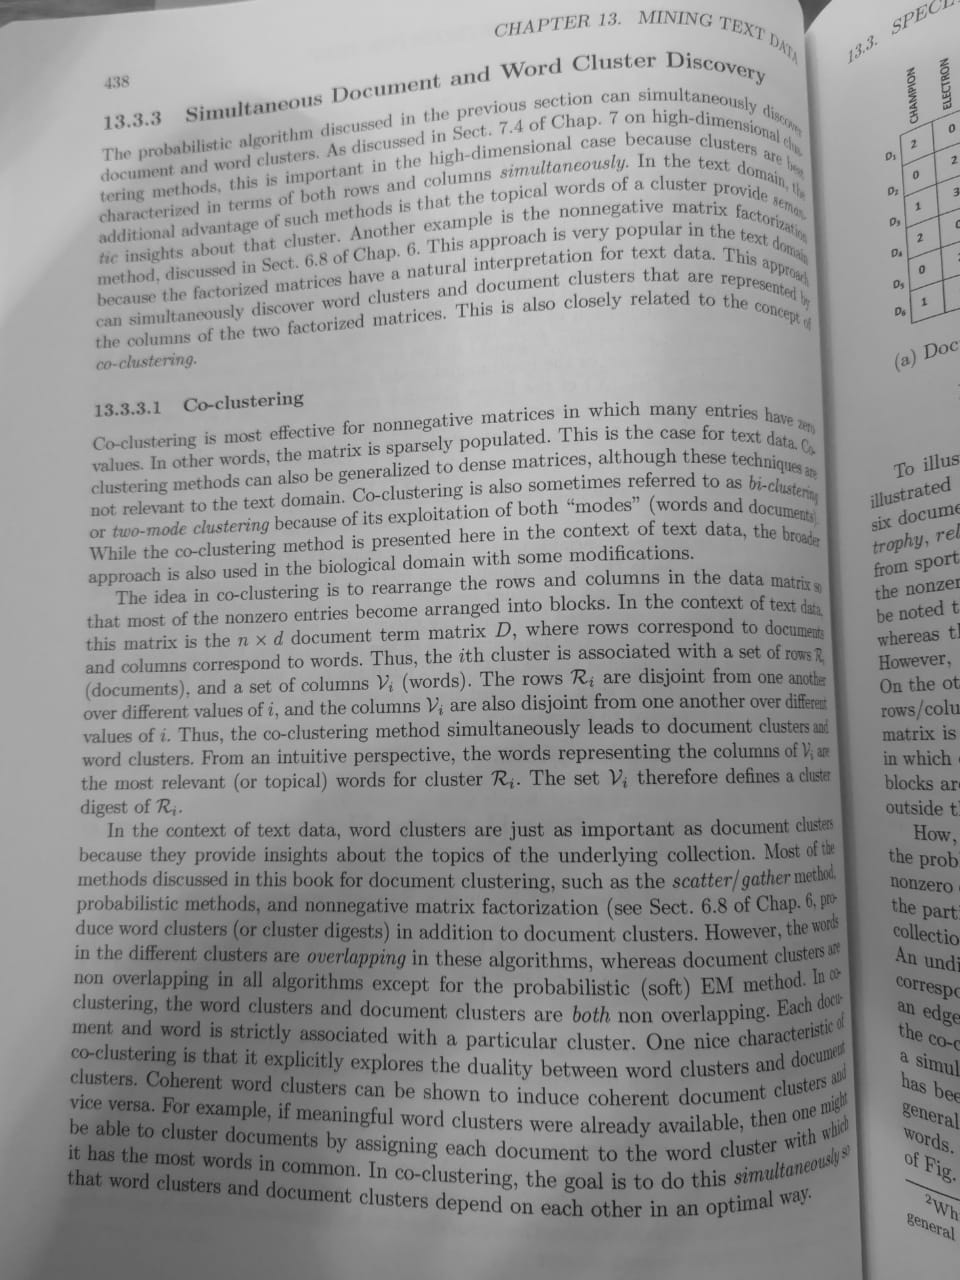

In [11]:
## load image as grayscale 
img = cv2.imread("scan.jpeg", 0)
cv2_imshow(img)

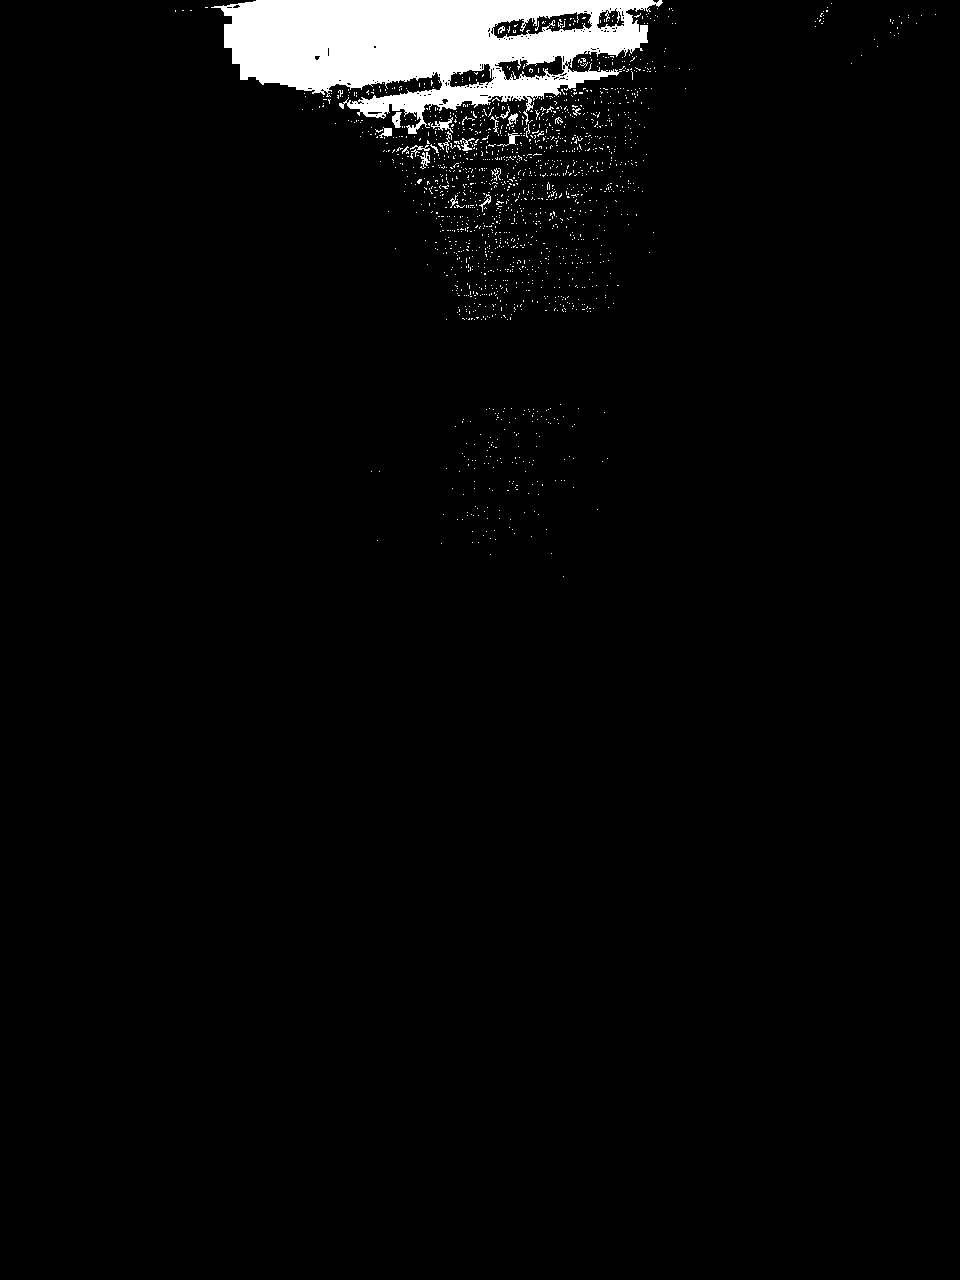

In [13]:
## Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret, threshold = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold) ## 1 Threshold Binary @127

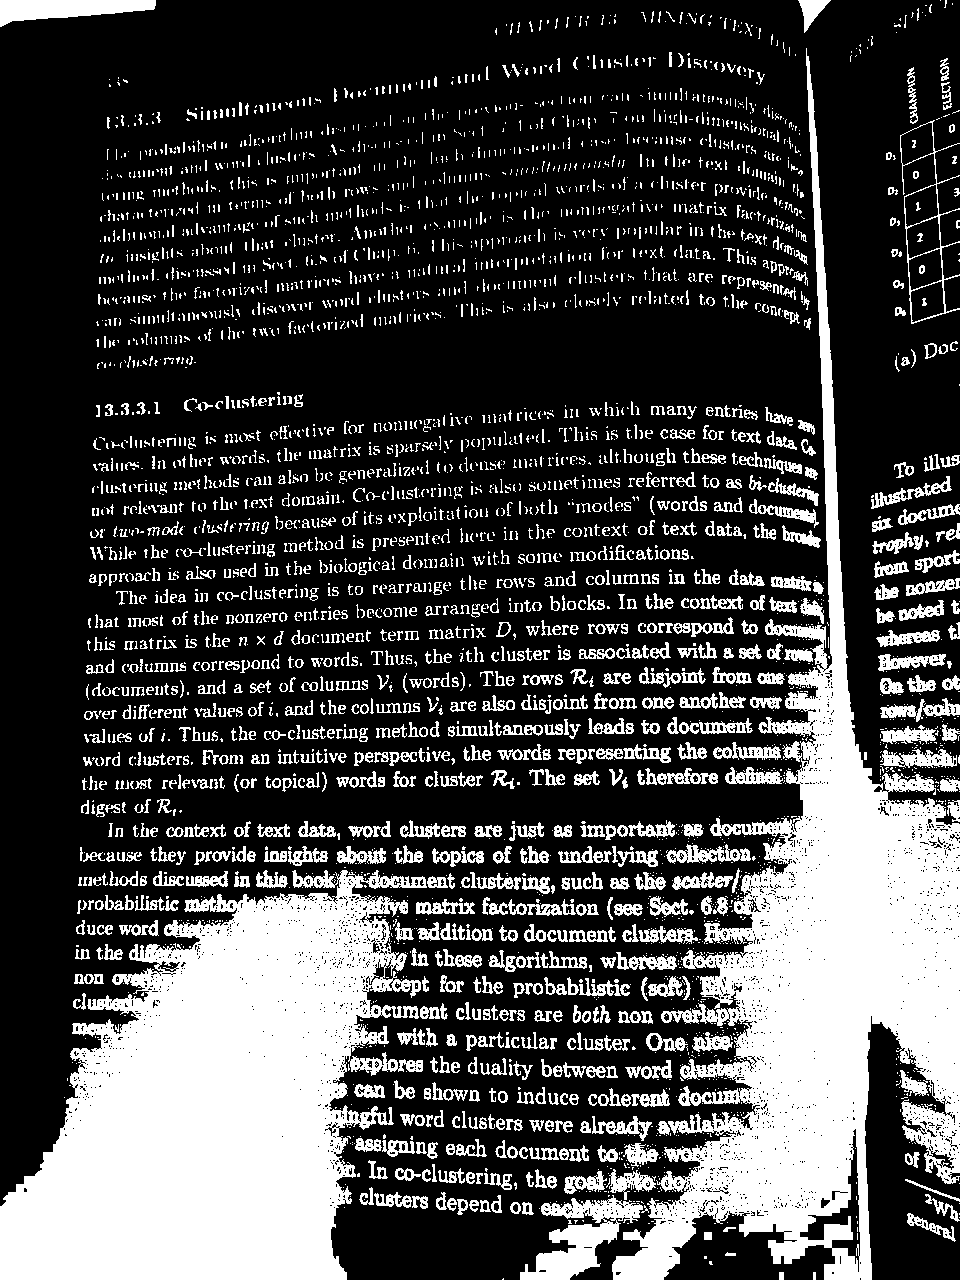

In [15]:
## Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)

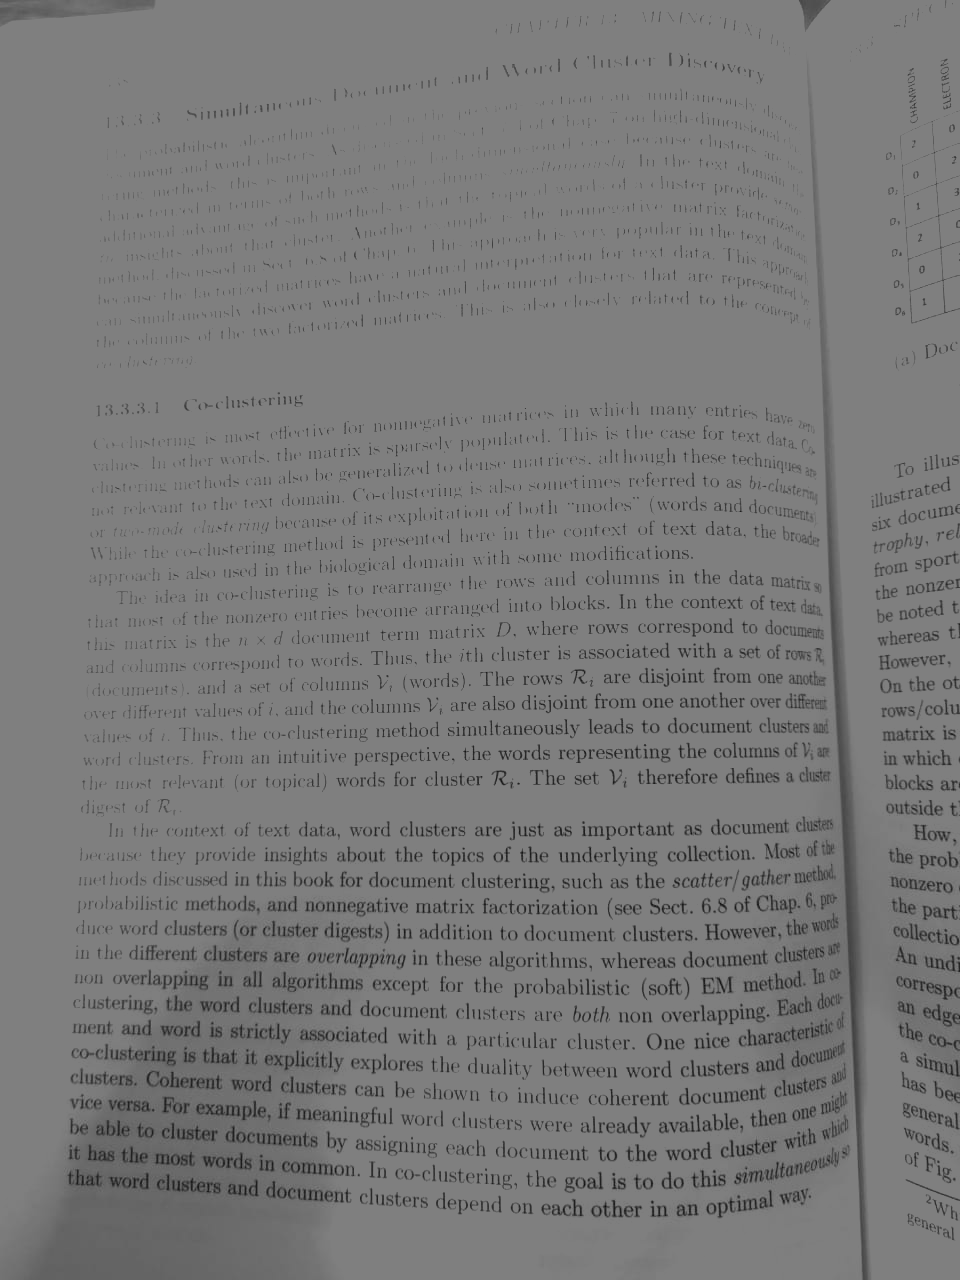

In [16]:
## Values below 127 are truncated (held) at 127 (the 255 argument is unused)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh3)

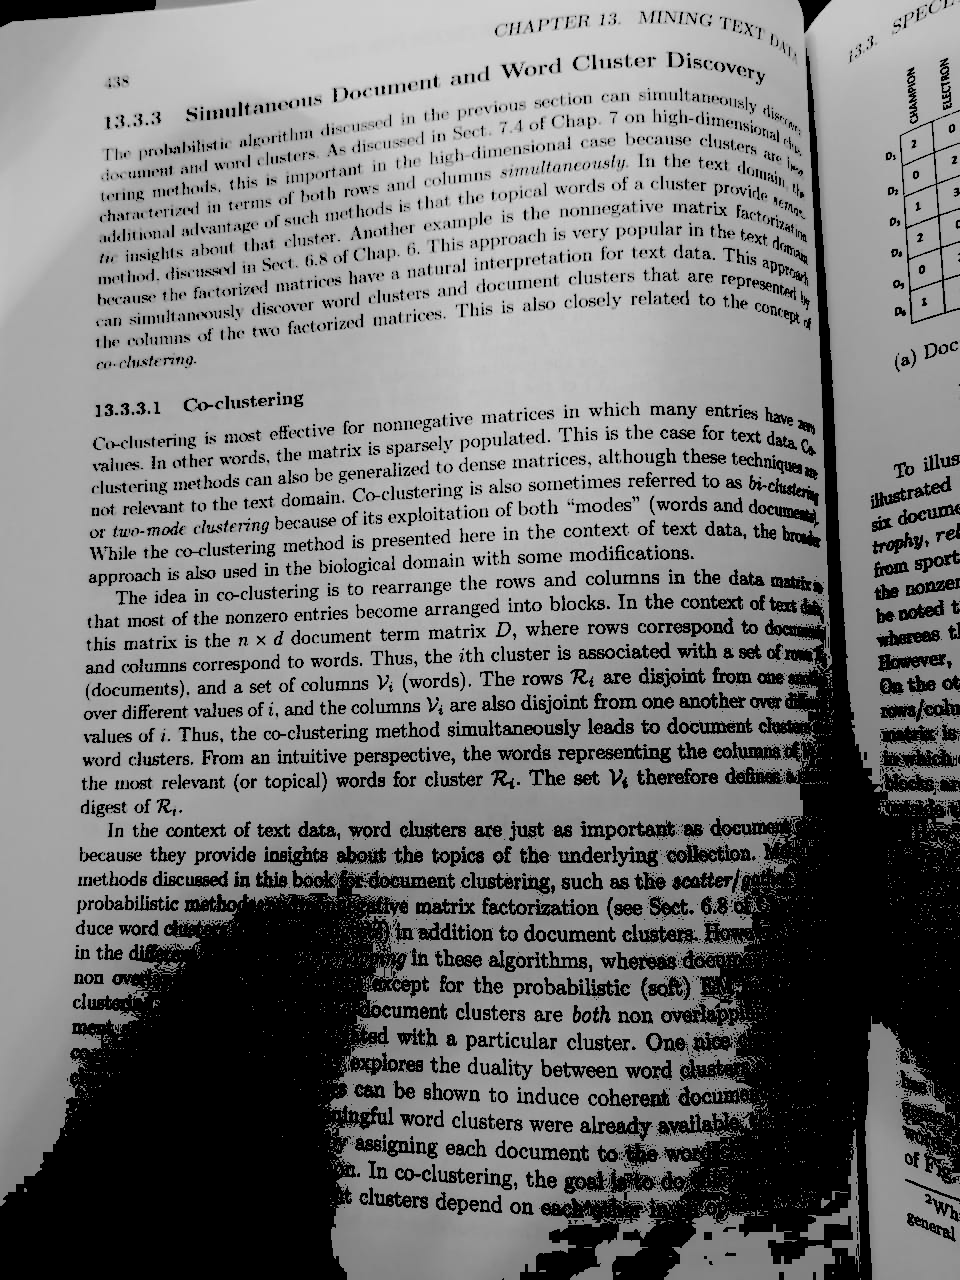

In [17]:
## Values below 127 go to 0, above 127 are unchanged
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh4)

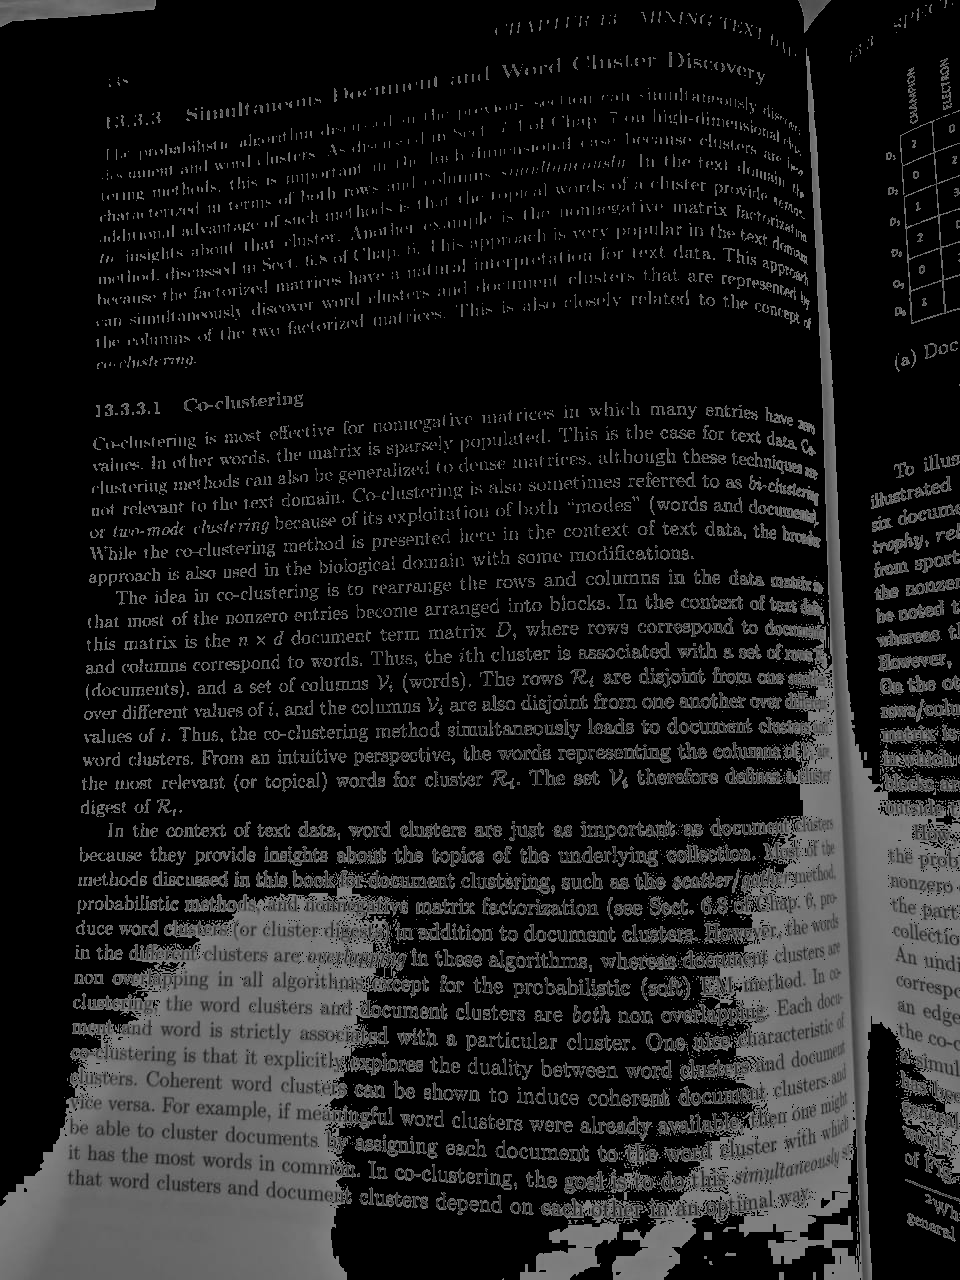

In [18]:
## Reverse of the above, below 127 is unachanged, above 127 goes to 0
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh5)

In [ ]:
##  Adaptive Thresholding
##      ADAPTIVE_THRESH_MEAN_C
##      THRESH_OTSU

##  cv2.adaptiveThreshold Parameters
##  cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst

##  src – Source 8-bit single-channel image.
##  dst – Destination image of the same size and the same type as src .
##  maxValue – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
##  adaptiveMethod – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
##  thresholdType – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
##  blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
##  C – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

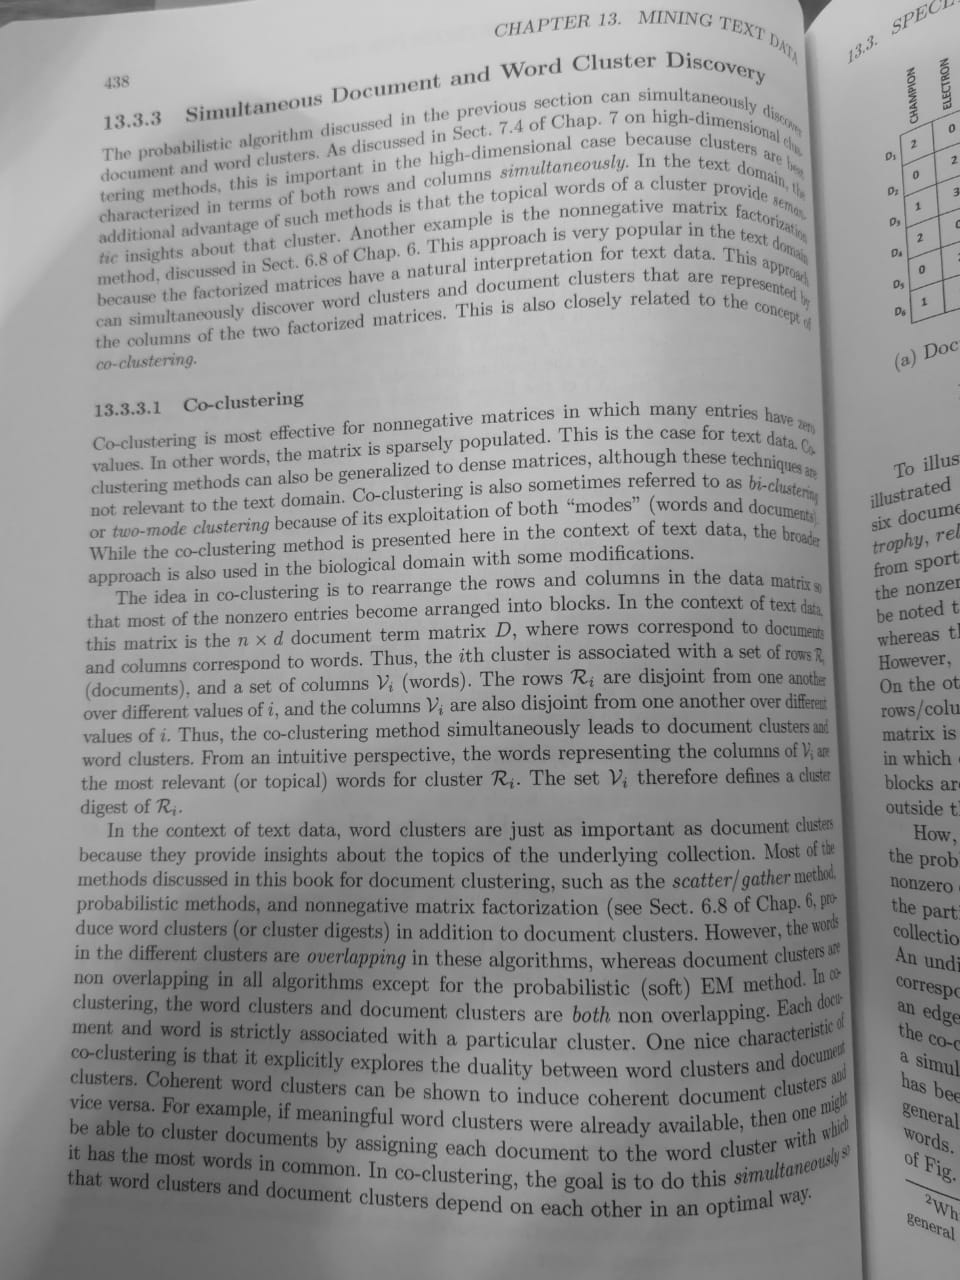

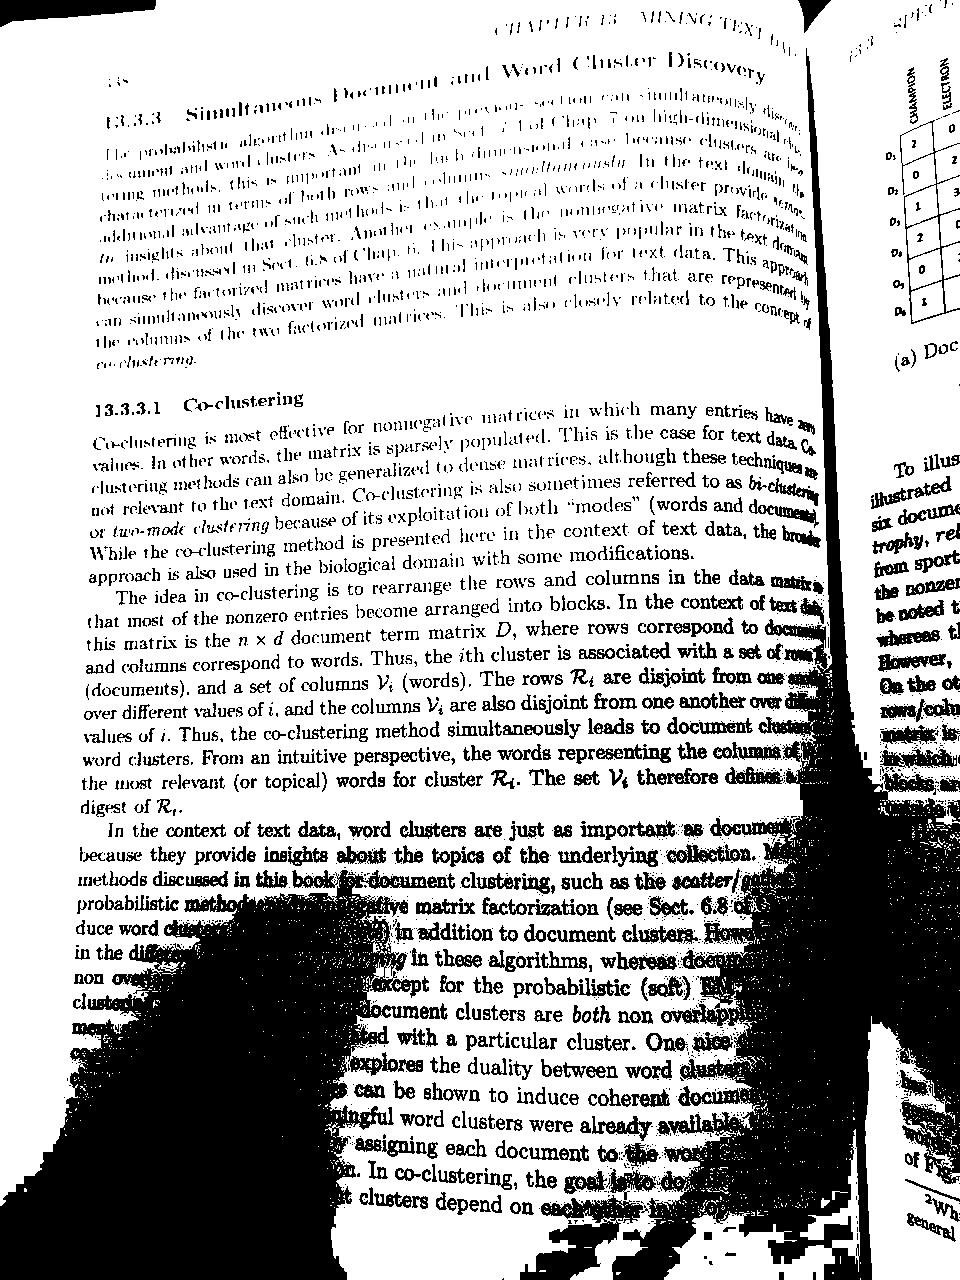

In [21]:
img = cv2.imread("scan.jpeg", 0)
cv2_imshow(img) ## original image

## Values below 127 goes to 0 (black, everything above goes to 255 (white))
ret, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

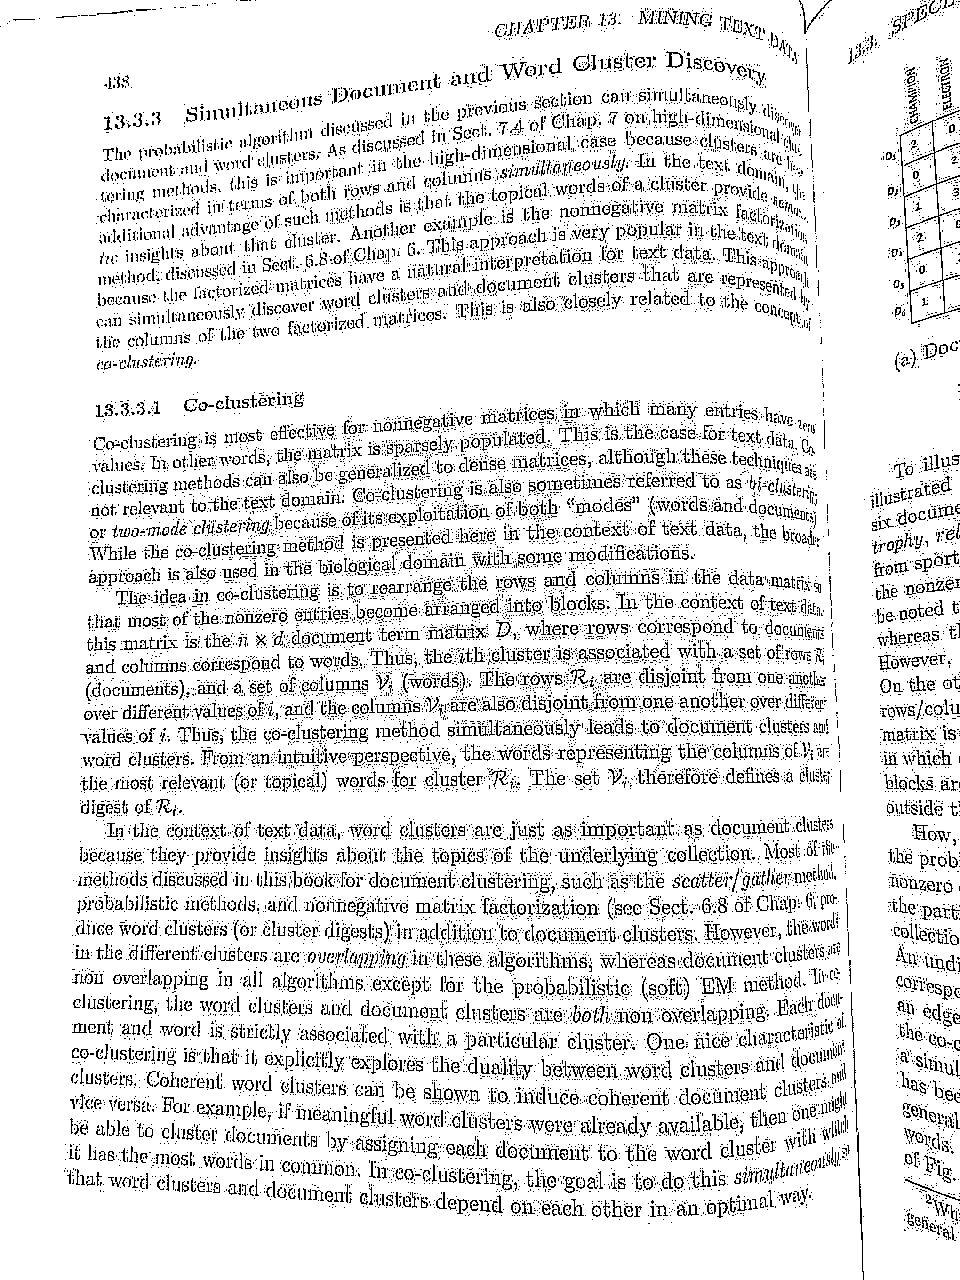

In [22]:
## It's good practive to blur images as it removes noise
## blur_img = cv2.GaussianBlur(img, (3, 3), 0)

## Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
cv2_imshow(thresh)

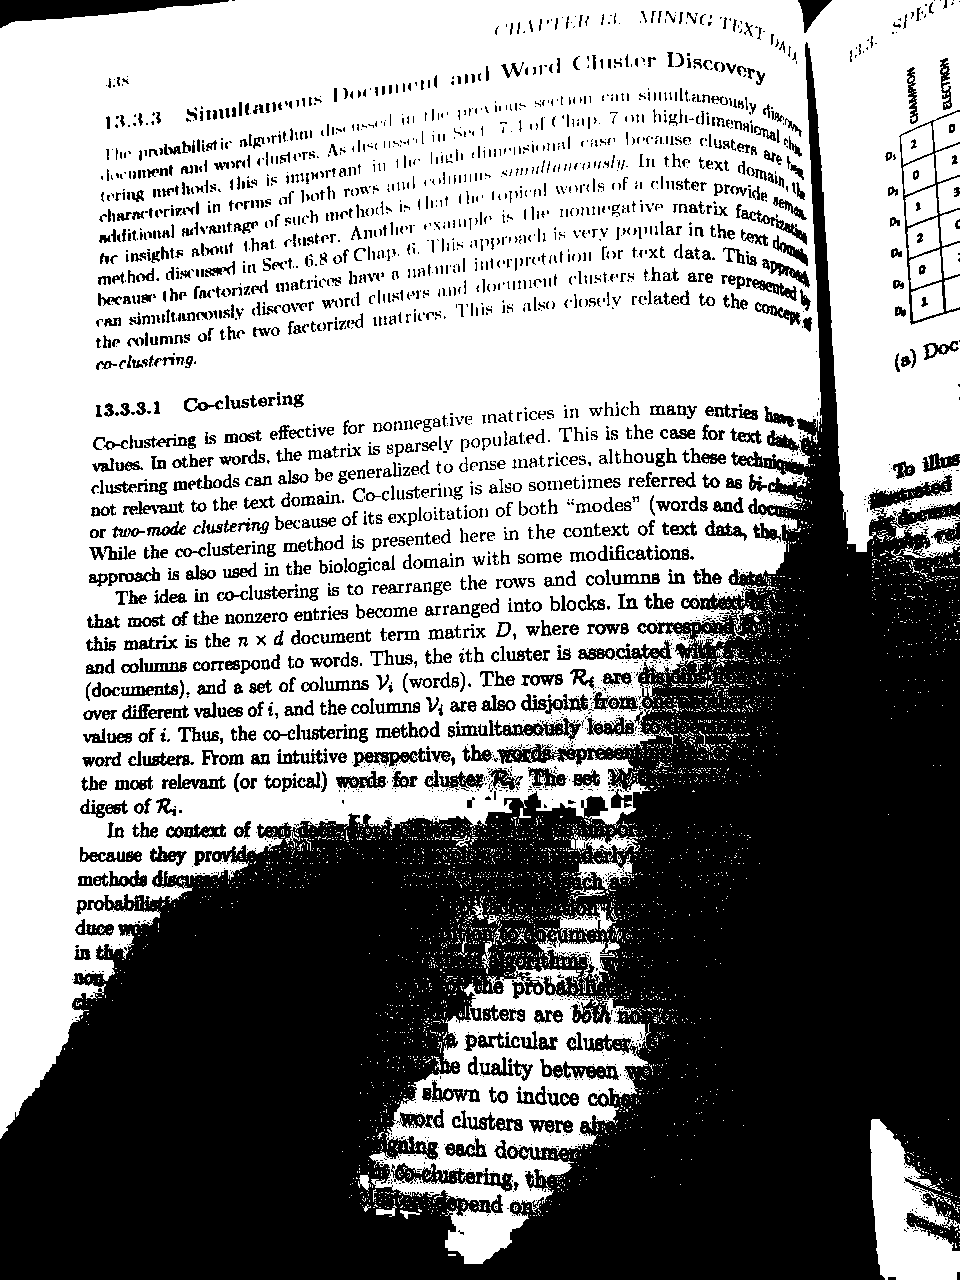

In [25]:
ret, thresh2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh2) ## Otsu Thresholding

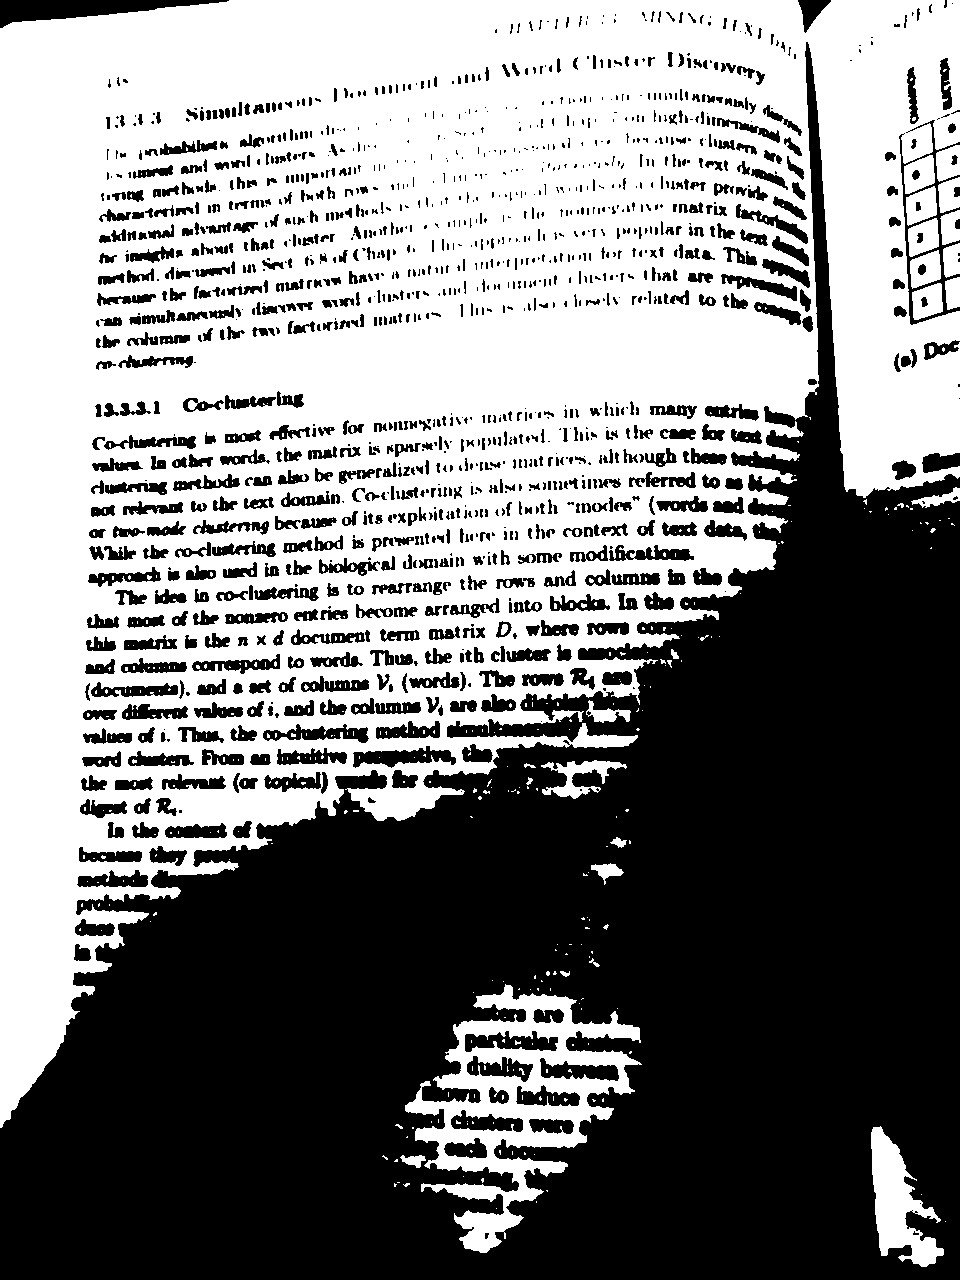

In [26]:
## Otsu's thresholding after Gaussian filtering
blurImg = cv2.GaussianBlur(img, (5, 5), 0)
ret, thresh3 = cv2.threshold(blurImg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh3)

In [27]:
##  SkImage Threshold Local
##  threshold_local(image, block_size, offset=10)

##  The threshold_local function, calculates thresholds in regions with a characteristic size block_size surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an offset value

##  https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

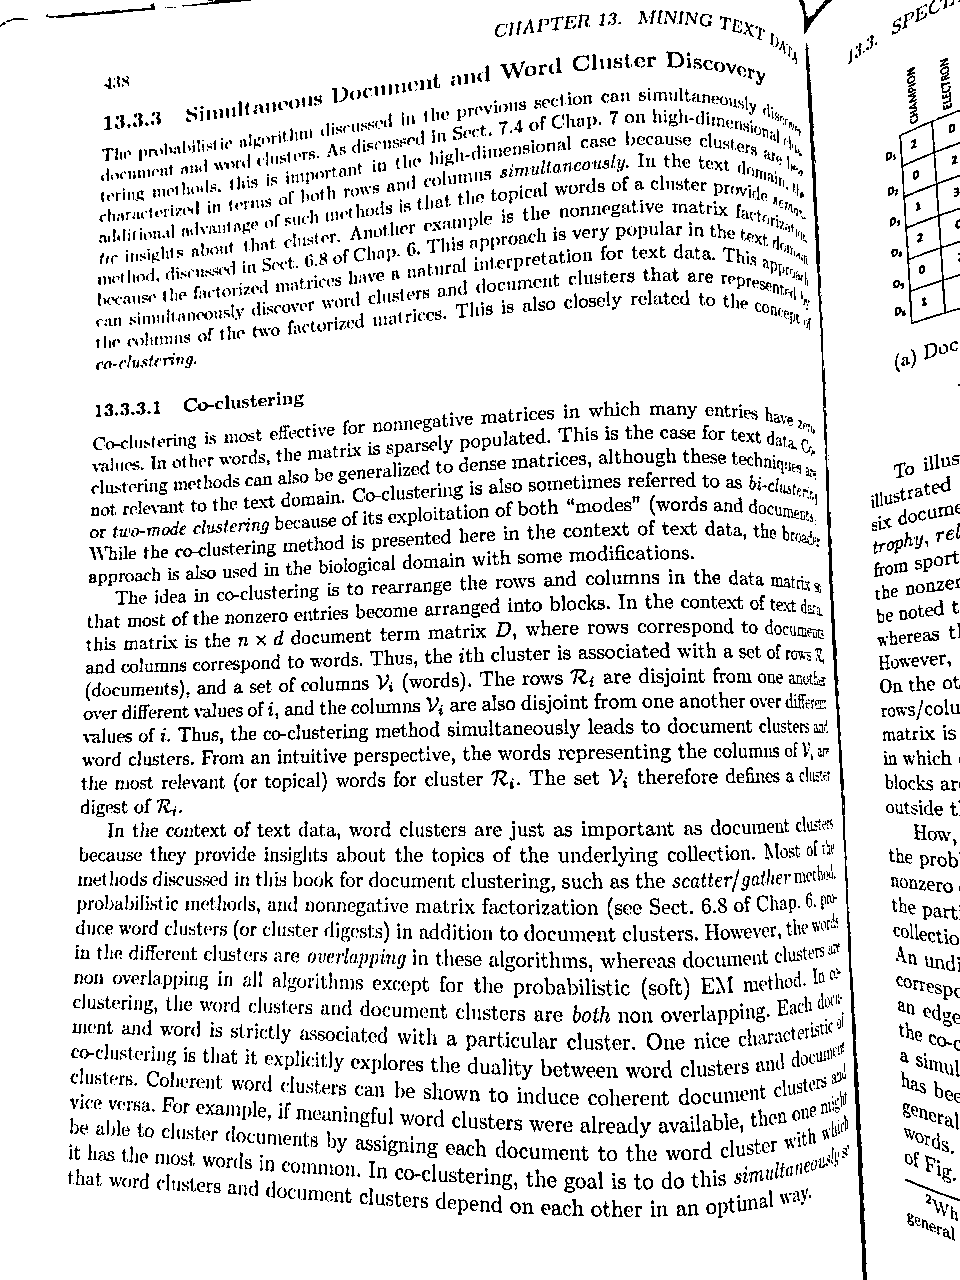

In [34]:
from skimage.filters import threshold_local

img = cv2.imread("scan.jpeg")

## We get the Value of component from the HSV color spaces
## then we apply adaptive thresholdingto

V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset = 15, method = "gaussian")

## Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
cv2_imshow(thresh) ## "threshold_local",

In [ ]:
##  Why Bluring is Important before Thresholding?
##      Answer - Noise


##  https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html